# XRT Blop Demo

For ophyd beamline setup see: https://github.com/NSLS-II/blop/blob/main/src/blop/sim/xrt_beamline.py and https://github.com/NSLS-II/blop/blob/main/src/blop/sim/xrt_kb_model.py

In [1]:
from blop.utils import prepare_re_env  # noqa
%run -i $prepare_re_env.__file__ --db-type=temp
bec.disable_plots()

In [2]:
import sys, os
from matplotlib import pyplot as plt
from blop.sim.xrt_beamline import Beamline

from blop import DOF, Objective, Agent
from blop.digestion import beam_stats_digestion
import time

In [3]:
plt.ion()

h_opt = 0
dh = 5

R1, dR1 = 40000, 10000
R2, dR2 = 20000, 10000

In [4]:
beamline = Beamline(name="bl")
time.sleep(1)
dofs = [
    DOF(description="KBV R",
        device=beamline.kbv_dsv,
        search_domain=(R1-dR1, R1+dR1)),
    DOF(description="KBH R",
        device=beamline.kbh_dsh,
        search_domain=(R2-dR2, R2+dR2)),

]

In [5]:
objectives = [
    Objective(name="bl_det_sum", 
              target="max",
              transform="log",
              trust_domain=(20, 1e12)),

    Objective(name="bl_det_wid_x",
              target="min",
              transform="log",
              # trust_domain=(0, 1e12),
              latent_groups=[("bl_kbh_dsh", "bl_kbv_dsv")]),
    Objective(name="bl_det_wid_y",
              target="min",
              transform="log",
              # trust_domain=(0, 1e12),
              latent_groups=[("bl_kbh_dsh", "bl_kbv_dsv")]),
]

In [6]:
agent = Agent(
    dofs=dofs,
    objectives=objectives,
    detectors=[beamline.det],
    digestion=beam_stats_digestion,
    digestion_kwargs={"image_key": "bl_det_image"},
    verbose=True,
    db=db,
    tolerate_acquisition_errors=False,
    enforce_all_objectives_valid=True,
    train_every=3,
)

In [7]:
RE(agent.learn("qr", n=16))
RE(agent.learn("qei", n=16, iterations=4))


2025-03-04 21:34:47.714 INFO: Executing plan <generator object Agent.learn at 0x7f19e2bc1150>


2025-03-04 21:34:47.716 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f19e411f5e0> from 'idle' -> 'running'


2025-03-04 21:34:47.718 INFO: running iteration 1 / 1




Transient Scan ID: 1     Time: 2025-03-04 21:34:47

Persistent Unique Scan ID: '8cfe4085-af0e-4bd5-9877-51611060acad'

ToroidMirror2

center:

[0, 11000, np.float64(176.33294076770102)]

New stream: 'primary'

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 21:34:47.8 |  35946.051 |  10524.053 |    471.846 |      212.625 |      151.479 |      350.250 |       33.208 |

|         2 | 21:34:47.9 |  34052.895 |  13502.582 |    676.702 |      237.250 |      153.463 |      314.050 |       74.625 |

|         3 | 21:34:48.0 |  38859.539 |  15321.527 |   1519.415 |      223.000 |      148.775 |      323.200 |       35.163 |

|         4 | 21:34:48.1 |  42734.109 |  14846.696 |   1894.965 |      204.181 |      154.060 |      290.062 |       57.420 |

|         5 | 21:34:48.2 |  47266.742 |  11594.795 |     33.540 |      192.450 |      144.725 |      384.900 |       66.350 |

|         6 | 21:34:48.3 |  47537.027 |  16777.785 |   1637.898 |      220.596 |      147.750 |      233.658 |      130.200 |

|         7 | 21:34:48.4 |  42462.711 |  19736.639 |  11740.962 |      201.153 |      146.480 |       41.951 |       59.470 |

|         8 | 21:34:48.5 |  40288.977 |  21810.246 |  21285.449 |      204.979 |      158.349 |       40.717 |       42.108 |

|         9 | 21:34:48.6 |  38540.586 |  23718.035 |  17172.356 |      212.597 |      153.736 |      117.639 |       20.847 |

|        10 | 21:34:48.7 |  31140.885 |  18632.166 |   7673.706 |      209.145 |      150.848 |       96.139 |      136.446 |

|        11 | 21:34:48.8 |  31459.141 |  20466.066 |   1775.401 |      193.769 |      150.730 |       12.446 |       91.311 |

|        12 | 21:34:48.9 |  33737.711 |  25576.047 |   7024.139 |      206.064 |      152.152 |      177.951 |       74.262 |

|        13 | 21:34:49.0 |  36263.191 |  28535.121 |   1721.908 |      190.858 |      152.486 |      296.583 |       51.791 |

|        14 | 21:34:49.1 |  45094.180 |  29991.160 |   1492.824 |      193.450 |      148.325 |      224.700 |       94.550 |

|        15 | 21:34:49.2 |  44904.812 |  26680.738 |   3597.485 |      205.200 |      156.322 |      179.500 |       90.069 |

|        16 | 21:34:49.3 |  49711.438 |  24788.711 |   2768.484 |      203.673 |      157.400 |      136.271 |      130.013 |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['8cfe4085'] (scan num: 1)

2025-03-04 21:34:50.931 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f19e411f5e0> from 'running' -> 'idle'


2025-03-04 21:34:50.933 INFO: Cleaned up from plan <generator object Agent.learn at 0x7f19e2bc1150>


2025-03-04 21:34:50.935 INFO: Executing plan <generator object Agent.learn at 0x7f19e2bc10e0>


2025-03-04 21:34:50.936 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f19e411f5e0> from 'idle' -> 'running'


2025-03-04 21:34:50.937 INFO: running iteration 1 / 4




Transient Scan ID: 2     Time: 2025-03-04 21:35:14

Persistent Unique Scan ID: 'e1804ebd-2899-4a00-9b0e-44ce7e95d205'

New stream: 'primary'

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 21:35:14.5 |  40721.152 |  20976.715 |  22655.477 |      194.647 |      154.304 |       14.437 |       47.222 |

|         2 | 21:35:14.6 |  39464.051 |  19047.539 |  20740.931 |      207.404 |      148.699 |       76.831 |       28.883 |

|         3 | 21:35:14.7 |  39394.844 |  20885.418 |  23211.041 |      193.746 |      152.672 |       14.169 |       29.181 |

|         4 | 21:35:14.8 |  38786.402 |  20831.121 |  23516.303 |      193.537 |      151.043 |       14.727 |       21.795 |

|         5 | 21:35:14.9 |  38570.000 |  20706.555 |  23615.361 |      193.652 |      149.455 |       14.423 |       20.718 |

|         6 | 21:35:15.0 |  38511.418 |  20987.365 |  23678.781 |      194.846 |      151.871 |       15.331 |       20.671 |

|         7 | 21:35:15.0 |  37940.984 |  21142.109 |  23761.596 |      196.528 |      152.175 |       18.190 |       18.033 |

|         8 | 21:35:15.1 |  38009.223 |  20838.975 |  23829.550 |      194.173 |      150.123 |       13.547 |       17.287 |

|         9 | 21:35:15.2 |  37967.457 |  20534.295 |  23716.971 |      193.883 |      147.734 |       13.849 |       17.378 |

|        10 | 21:35:15.3 |  37447.949 |  20633.260 |  23535.457 |      192.789 |      149.691 |       15.047 |       20.427 |

|        11 | 21:35:15.4 |  37284.602 |  20888.947 |  23469.830 |      193.822 |      151.900 |       13.591 |       21.300 |

|        12 | 21:35:15.5 |  37385.102 |  21097.879 |  23570.788 |      195.992 |      153.180 |       16.193 |       19.667 |

|        13 | 21:35:15.6 |  36596.434 |  20944.469 |  23104.350 |      193.801 |      154.548 |       15.281 |       31.734 |

|        14 | 21:35:15.7 |  34046.805 |  21553.121 |  10486.947 |      199.008 |      158.389 |       37.712 |       66.485 |

|        15 | 21:35:15.8 |  30000.000 |  21613.787 |   1932.958 |      191.476 |      150.349 |       47.330 |      123.383 |

|        16 | 21:35:15.9 |  30000.000 |  12987.559 |     31.986 |      226.500 |      184.500 |      245.000 |      138.000 |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['e1804ebd'] (scan num: 2)

2025-03-04 21:35:17.327 INFO: running iteration 2 / 4




Transient Scan ID: 3     Time: 2025-03-04 21:35:25

Persistent Unique Scan ID: '3950dfc6-405d-4dab-a7a7-ff5550b0c0ab'

New stream: 'primary'

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 21:35:25.9 |  36697.508 |  20218.539 |  23169.704 |      196.256 |      146.789 |       15.338 |       29.063 |

|         2 | 21:35:26.0 |  36752.797 |  20580.109 |  23407.256 |      192.582 |      150.174 |       14.531 |       28.618 |

|         3 | 21:35:26.1 |  37163.355 |  20535.354 |  23434.148 |      193.405 |      149.545 |       14.372 |       22.555 |

|         4 | 21:35:26.2 |  37933.746 |  20720.914 |  23839.070 |      193.493 |      149.295 |       13.898 |       17.735 |

|         5 | 21:35:26.3 |  37934.488 |  20649.402 |  23854.872 |      193.673 |      149.001 |       14.093 |       16.975 |

|         6 | 21:35:26.4 |  38477.328 |  20434.520 |  23506.202 |      195.168 |      146.847 |       14.348 |       21.051 |

|         7 | 21:35:26.6 |  38771.922 |  21132.975 |  23430.188 |      196.563 |      153.604 |       17.160 |       22.638 |

|         8 | 21:35:26.7 |  38771.879 |  21133.076 |  23318.794 |      196.761 |      153.149 |       16.871 |       22.252 |

|         9 | 21:35:26.8 |  39920.598 |  20455.715 |  22899.445 |      194.054 |      148.524 |       15.084 |       39.329 |

|        10 | 21:35:26.9 |  45741.098 |  20457.840 |   3987.499 |      194.863 |      150.500 |       11.713 |       81.500 |

|        11 | 21:35:27.0 |  45924.324 |  20580.258 |   3248.950 |      193.978 |      150.854 |       13.176 |       96.407 |

|        12 | 21:35:27.1 |  49723.844 |  17169.592 |   1668.193 |      201.945 |      151.883 |      170.990 |      132.367 |

|        13 | 21:35:27.3 |  49796.852 |  20762.826 |   2039.773 |      193.496 |      165.167 |       16.523 |      117.633 |

|        14 | 21:35:27.4 |  50000.000 |  21108.773 |   2628.379 |      197.558 |      156.600 |       14.209 |      129.600 |

|        15 | 21:35:27.5 |  49652.836 |  21725.574 |   2151.309 |      195.804 |      155.072 |       64.415 |      143.577 |

|        16 | 21:35:27.6 |  49613.117 |  25090.010 |   2436.163 |      220.172 |      151.776 |      139.195 |      160.977 |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['3950dfc6'] (scan num: 3)

2025-03-04 21:35:28.872 INFO: running iteration 3 / 4




Transient Scan ID: 4     Time: 2025-03-04 21:35:46

Persistent Unique Scan ID: 'a2878e4a-5107-40f2-99b2-699eb038ffc4'

New stream: 'primary'

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 21:35:47.0 |  39922.895 |  28969.725 |    614.969 |      209.071 |      150.980 |      308.708 |       52.939 |

|         2 | 21:35:47.1 |  36682.965 |  28458.562 |   1763.947 |      199.265 |      151.355 |      336.296 |       44.042 |

|         3 | 21:35:47.2 |  36683.145 |  28458.467 |   1583.864 |      198.400 |      151.164 |      341.340 |       46.084 |

|         4 | 21:35:47.3 |  36667.734 |  28445.770 |   1438.873 |      202.561 |      152.029 |      347.897 |       47.801 |

|         5 | 21:35:47.4 |  35773.988 |  28539.027 |   6695.350 |      210.880 |      153.051 |      237.640 |       50.803 |

|         6 | 21:35:47.5 |  31684.721 |  29927.674 |    925.619 |      204.267 |      148.607 |      271.733 |      104.147 |

|         7 | 21:35:47.6 |  30809.590 |  29970.969 |    558.655 |      198.333 |      149.500 |      305.333 |      141.000 |

|         8 | 21:35:47.8 |  30000.000 |  30000.000 |    366.643 |      212.854 |      155.504 |      227.608 |      150.958 |

|         9 | 21:35:47.9 |  30036.805 |  29544.104 |    384.778 |      243.525 |      170.250 |      168.850 |      127.400 |

|        10 | 21:35:48.0 |  32141.100 |  28390.717 |   1417.077 |      200.317 |      154.403 |      220.267 |      113.773 |

|        11 | 21:35:48.1 |  31877.812 |  28135.615 |   1412.148 |      203.583 |      157.162 |      166.667 |       99.425 |

|        12 | 21:35:48.2 |  30567.236 |  26302.723 |   1438.937 |      214.140 |      154.833 |      149.695 |      116.983 |

|        13 | 21:35:48.3 |  31356.846 |  25757.127 |   2400.954 |      206.796 |      150.898 |      164.042 |      117.429 |

|        14 | 21:35:48.4 |  37029.574 |  25390.977 |   6316.756 |      217.750 |      154.868 |      172.500 |       29.570 |

|        15 | 21:35:48.5 |  31962.100 |  24186.391 |   5724.596 |      199.913 |      152.434 |      126.916 |      109.282 |

|        16 | 21:35:48.7 |  34059.234 |  21195.938 |   9612.773 |      197.792 |      157.567 |       15.463 |       68.785 |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['a2878e4a'] (scan num: 4)

2025-03-04 21:35:49.803 INFO: running iteration 4 / 4




Transient Scan ID: 5     Time: 2025-03-04 21:36:05

Persistent Unique Scan ID: '8dbc58de-eade-49aa-a40b-107064beecbe'

New stream: 'primary'

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 21:36:05.5 |  36380.605 |  20947.578 |  22986.816 |      193.968 |      153.930 |       14.856 |       35.041 |

|         2 | 21:36:05.6 |  36661.973 |  20833.641 |  23232.853 |      193.088 |      153.020 |       13.772 |       29.018 |

|         3 | 21:36:05.7 |  38437.441 |  21144.227 |  23561.534 |      196.433 |      152.801 |       18.875 |       20.808 |

|         4 | 21:36:05.8 |  37860.586 |  20920.387 |  23759.850 |      194.457 |      150.575 |       14.721 |       17.840 |

|         5 | 21:36:05.9 |  37858.594 |  20917.707 |  23774.056 |      194.692 |      151.114 |       14.401 |       18.349 |

|         6 | 21:36:06.0 |  37906.770 |  20787.359 |  23842.758 |      193.985 |      149.841 |       13.276 |       17.337 |

|         7 | 21:36:06.1 |  38029.547 |  20730.541 |  23861.782 |      193.533 |      149.619 |       13.984 |       18.463 |

|         8 | 21:36:06.2 |  37933.059 |  20632.428 |  23740.644 |      193.882 |      148.962 |       13.920 |       17.760 |

|         9 | 21:36:06.3 |  37939.031 |  20460.652 |  23869.762 |      194.068 |      147.655 |       15.110 |       17.499 |

|        10 | 21:36:06.3 |  37692.754 |  20422.090 |  23564.516 |      194.478 |      147.389 |       13.972 |       17.689 |

|        11 | 21:36:06.4 |  37937.852 |  20289.867 |  23688.066 |      196.136 |      146.182 |       16.236 |       17.964 |

|        12 | 21:36:06.5 |  36634.980 |  20283.393 |  23077.611 |      195.469 |      147.150 |       15.812 |       31.700 |

|        13 | 21:36:06.6 |  37735.613 |  19840.324 |  23533.103 |      201.638 |      144.638 |       28.860 |       18.930 |

|        14 | 21:36:06.7 |  38441.215 |  19834.340 |  23157.035 |      202.124 |      144.549 |       29.617 |       21.434 |

|        15 | 21:36:06.8 |  39064.883 |  19448.402 |  22226.845 |      203.370 |      146.687 |       59.740 |       26.929 |

|        16 | 21:36:06.9 |  39314.930 |  20280.375 |  23133.260 |      197.349 |      146.014 |       14.437 |       30.698 |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['8dbc58de'] (scan num: 5)

2025-03-04 21:36:08.256 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f19e411f5e0> from 'running' -> 'idle'


2025-03-04 21:36:08.258 INFO: Cleaned up from plan <generator object Agent.learn at 0x7f19e2bc10e0>


('e1804ebd-2899-4a00-9b0e-44ce7e95d205',
 '3950dfc6-405d-4dab-a7a7-ff5550b0c0ab',
 'a2878e4a-5107-40f2-99b2-699eb038ffc4',
 '8dbc58de-eade-49aa-a40b-107064beecbe')

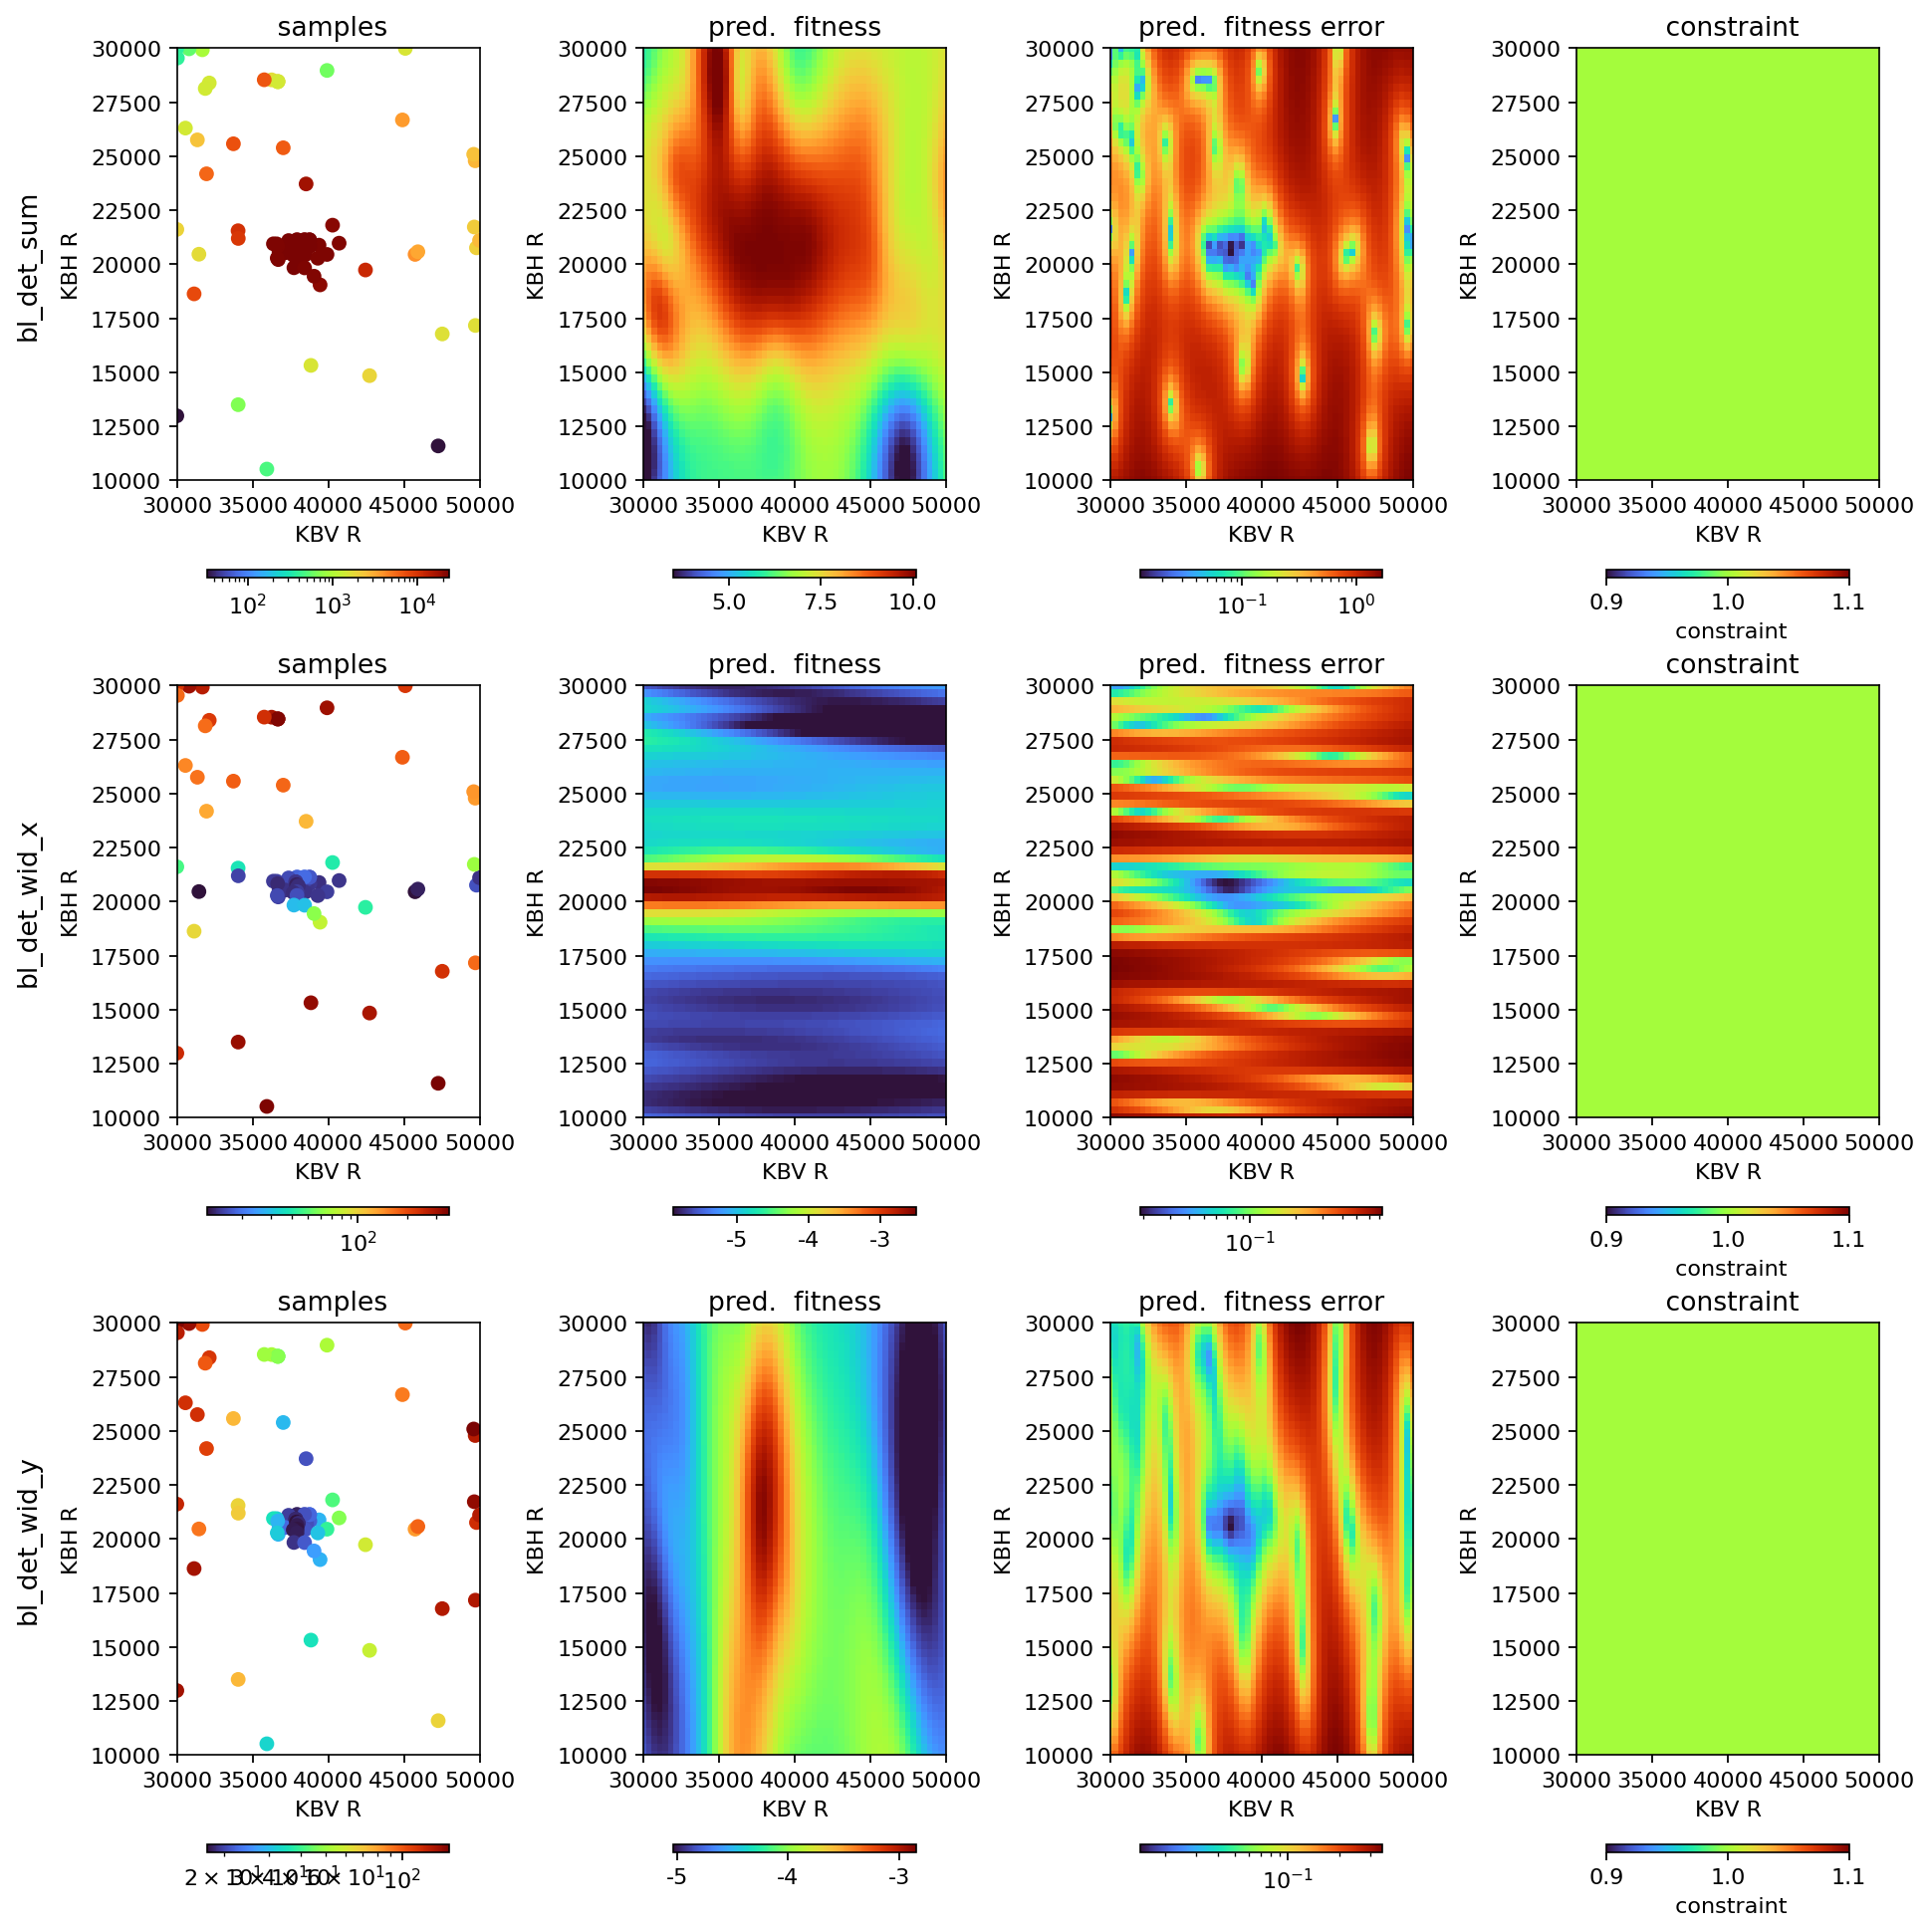

In [8]:
agent.plot_objectives(axes=(0, 1))